In [1]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import pi

my_api_token = '003291c16eb429714d12e692e30a659fbaeeac899511352219d02e96ceb0b4d55be7b29b3dd777c6c5e9c16a0d26addfc0f76d626ebef931273c7f96bf409d09'
url = 'https://quantumexperience.ng.bluemix.net/qx/account/advanced'
IBMQ.save_account(my_api_token, url, overwrite=True)

IBMQ.stored_accounts()
IBMQ.enable_account(my_api_token)
IBMQ.active_accounts()

[{'token': '003291c16eb429714d12e692e30a659fbaeeac899511352219d02e96ceb0b4d55be7b29b3dd777c6c5e9c16a0d26addfc0f76d626ebef931273c7f96bf409d09',
  'url': 'https://quantumexperience.ng.bluemix.net/api'}]

In [ ]:
#IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 16 and
                                                       not x.configuration().simulator)
#backend = least_busy(large_enough_devices)
backend = IBMQ.get_backend('ibmqx2') 
print(backend)

shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

{'001': 1024, '100': 1017, '000': 7}


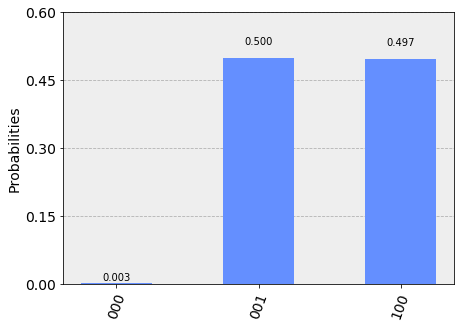

In [3]:
# 11 N=3,M=3,d0=1,|psi>=1/2[1,1,1,0]
phi=2*np.arcsin(np.sqrt(1/3))
J=0
# Create a Quantum Register with 3 qubits.
n = 3
qr = QuantumRegister(n)#Oracle工作空间为qr[0]
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr,cr)

qc.ry(1.2310,qr[2])
qc.x(qr[2])
qc.ch(qr[2],qr[0])
qc.x(qr[2])

for i in range(int(J)+1):
    #oracle 标记11
    qc.u1(phi,qr[2])
    qc.x(qr[2])
    qc.cu1(phi,qr[2],qr[0])
    qc.x(qr[2])
    
    #Hn
    qc.x(qr[2])
    qc.ch(qr[2],qr[0])
    qc.x(qr[2])
    qc.ry(-1.2310,qr[2])

    #条件相移
    qc.x(qr[2])
    qc.u1(phi,qr[2])
    qc.cu1(-phi,qr[2],qr[0])
    qc.x(qr[2])
        
    #Hn
    qc.ry(1.2310,qr[2])
    qc.x(qr[2])
    qc.ch(qr[2],qr[0])
    qc.x(qr[2])

#测量
qc.measure(qr[0],cr[0])
qc.measure(qr[2],cr[2])

backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=2048)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


print(counts)
plot_histogram(counts)

Available backends: [<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQSimulator('ibmq_qasm_simulator') from IBMQ()>]
ibmqx2
Job Status: job has successfully run


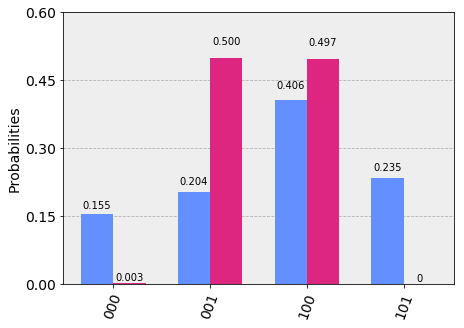

In [5]:
#IBMQ.load_accounts()
print("Available backends:",IBMQ.backends())

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration().n_qubits < 16 and
                                                       not x.configuration().simulator)
#backend = least_busy(large_enough_devices)
backend = IBMQ.get_backend('ibmqx2') 
print(backend)

shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 5        # Maximum number of credits to spend on executions. 
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])